#  Notebook para determinação da quantidade de Daily rain (mm) - PERIODO SECO

## Importações e Configurações iniciais

In [133]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib.pyplot as plt

import seaborn as sns # Statistical data visualization

import plotly.graph_objects as go
import plotly.express as px
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, Dense, Dropout, Masking, Embedding

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Análise Exploratória dos Dados

In [134]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-', '926.4923.8','185.488.992','4.535.416.667','3.495.833.333','2.015.833.333','2.489.166.667','4.745.416.667','3.227.916.667','3.594.166.667','3.720.416.667']

dados_clima = pd.read_csv("C:/Users/auped/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/Titanic/modelo global/dadosclima_ajustado.csv", header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Max Temperature (°C)', 'Min Temperature (°C)', 'Average temperature (°C)', 'Wind Speed (m/s)', 'Solar Radiation (cal/cm²/h)', 'Pressure (mb)', 'Relative humidity (%)', 'Daily rain (mm)', 'Month', 'Year']
dados_clima['Pressure (mb)'] = dados_clima['Pressure (mb)'].str.replace(',,', '')
dados_clima['Relative humidity (%)'] = dados_clima['Relative humidity (%)'].astype(float)
dados_clima['Pressure (mb)'] = dados_clima['Pressure (mb)'].astype(float)
dados_clima['Year'] = dados_clima['Year'].str.replace(',,', '')
dados_clima['Year'] = dados_clima['Year'].astype(int)
#dados_clima['Year'] = dados_clima['Mês'].astype(int)
dados_clima['Wind Speed (m/s)'] = dados_clima['Wind Speed (m/s)'].astype(float)
dados_clima['Wind Speed (m/s)'] = dados_clima['Wind Speed (m/s)']/3.6 #transformando para m/s
dados_clima['Solar Radiation (cal/cm²/h)'] = dados_clima['Solar Radiation (cal/cm²/h)'].astype(float)

combine = [dados_clima]
chuva = dados_clima['Daily rain (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()




,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,23.6,1,1983
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,20.4,1,1983
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,21.2,1,1983
3,28.2,17.0,22.6,1.180556,420.20,931.3,8.0,0.0,1,1983
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,40.0,1,1983
5,25.4,19.0,22.2,1.338889,280.13,928.2,93.4,53.2,1,1983
6,26.0,20.0,23.0,1.166667,350.17,928.2,93.6,0.6,1,1983
7,26.0,14.4,20.2,0.902778,360.17,926.5,100.0,4.4,1,1983
8,27.8,16.6,22.2,0.663889,350.17,927.4,83.2,6.0,1,1983
9,29.0,19.8,24.4,0.677778,340.16,929.1,86.6,3.2,1,1983


In [135]:
dados_clima.describe()

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year
count,13297.000000,13299.000000,13311.000000,12882.000000,1.294500e+04,13021.000000,11681.000000,13406.000000,13421.000000,13421.000000
mean,27.886343,14.175675,21.049129,0.893429,4.716028e+06,934.185017,71.213168,3.906196,6.491916,2000.876909
std,3.788595,4.073522,3.482316,0.755234,6.149754e+07,205.277687,15.780946,9.869687,3.439691,10.608740
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1983.000000
25%,25.800000,11.400000,18.900000,0.425000,2.871500e+02,929.000000,63.500000,0.000000,4.000000,1992.000000
50%,28.200000,14.900000,21.500000,0.700000,3.649800e+02,933.400000,73.300000,0.000000,7.000000,2001.000000
75%,30.600000,17.400000,23.700000,1.136111,4.602200e+02,937.400000,82.000000,1.600000,9.000000,2010.000000
max,39.200000,28.600000,34.200000,27.555556,4.869536e+09,9925.800000,100.000000,82.400000,12.000000,2019.000000


In [136]:
dftabela = dados_clima.describe() 
dftabela.to_excel("tabelaestatisticaCHUVOSO.xlsx")

### Criação de uma nova classe que determina se naquele dia choveu ou não

In [137]:

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Daily rain (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Daily rain (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   



,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year,Choveu?
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,23.6,1,1983,1.0
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,20.4,1,1983,1.0
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,21.2,1,1983,1.0
3,28.2,17.0,22.6,1.180556,420.20,931.3,8.0,0.0,1,1983,0.0
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,40.0,1,1983,1.0


In [138]:
dados_clima.describe()

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year,Choveu?
count,13297.000000,13299.000000,13311.000000,12882.000000,1.294500e+04,13021.000000,11681.000000,13406.000000,13421.000000,13421.000000,13406.000000
mean,27.886343,14.175675,21.049129,0.893429,4.716028e+06,934.185017,71.213168,3.906196,6.491916,2000.876909,0.325973
std,3.788595,4.073522,3.482316,0.755234,6.149754e+07,205.277687,15.780946,9.869687,3.439691,10.608740,0.468755
min,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1983.000000,0.000000
25%,25.800000,11.400000,18.900000,0.425000,2.871500e+02,929.000000,63.500000,0.000000,4.000000,1992.000000,0.000000
50%,28.200000,14.900000,21.500000,0.700000,3.649800e+02,933.400000,73.300000,0.000000,7.000000,2001.000000,0.000000
75%,30.600000,17.400000,23.700000,1.136111,4.602200e+02,937.400000,82.000000,1.600000,9.000000,2010.000000,1.000000
max,39.200000,28.600000,34.200000,27.555556,4.869536e+09,9925.800000,100.000000,82.400000,12.000000,2019.000000,1.000000


In [139]:
print('\nMissing Values no dataframe:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe:
Max Temperature (°C)            124
Min Temperature (°C)            122
Average temperature (°C)        110
Wind Speed (m/s)                539
Solar Radiation (cal/cm²/h)     476
Pressure (mb)                   400
Relative humidity (%)          1740
Daily rain (mm)                  15
Month                             0
Year                              0
Choveu?                          15
dtype: int64


In [140]:
#Tratar os Missing Values (Valores Ausentes)

dados_clima['Min Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Average temperature (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Wind Speed (m/s)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Solar Radiation (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['Relative humidity (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Daily rain (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressure (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Max Temperature (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
#dados_clima['Choveu?'] = dados_clima['Choveu?'].astype(int)


#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Max Temperature (°C)           0
Min Temperature (°C)           0
Average temperature (°C)       0
Wind Speed (m/s)               0
Solar Radiation (cal/cm²/h)    0
Pressure (mb)                  0
Relative humidity (%)          0
Daily rain (mm)                0
Month                          0
Year                           0
Choveu?                        0
dtype: int64


In [141]:
# Usamos a correlação de Pearson e ordenamos os valores
columns_corr = dados_clima.corr(method='pearson')['Daily rain (mm)'].sort_values()
print(columns_corr)

Max Temperature (°C)          -0.086593
Month                         -0.074929
Year                          -0.017555
Pressure (mb)                  0.003334
Solar Radiation (cal/cm²/h)    0.012216
Wind Speed (m/s)               0.012870
Average temperature (°C)       0.057712
Min Temperature (°C)           0.178226
Relative humidity (%)          0.179543
Choveu?                        0.569443
Daily rain (mm)                1.000000
Name: Daily rain (mm), dtype: float64


## Seleção do Período para Análise

In [142]:
data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1983
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019

In [143]:
dados_clima.drop(dados_clima.loc[dados_clima['Daily rain (mm)']==0].index, inplace=True)


In [144]:
dadosparateste = dados_clima.copy()

#Criando uma nova coluna de chuva para ficar no final do dataframe

qtdchuva = dadosparateste['Daily rain (mm)']


dadosparateste['Chuva att (mm)'] = qtdchuva

#Visualização das primeiras cinco linhas da tabela
dadosparateste.head()  

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Daily rain (mm),Month,Year,Choveu?,Chuva att (mm)
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,23.6,1,1983,1.0,23.6
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,20.4,1,1983,1.0,20.4
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,21.2,1,1983,1.0,21.2
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,40.0,1,1983,1.0,40.0
5,25.4,19.0,22.2,1.338889,280.13,928.2,93.4,53.2,1,1983,1.0,53.2


In [145]:
dadosparateste.drop(columns = ['Daily rain (mm)'], axis = 1, inplace=True)


## Criar funções que serão utilizadas por todos os Modelos

In [146]:
# Library para statmodels
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error

#Definir funções que serão utilizadas por todos os modelos de predição

#Imprimir mensagens de erro da predição
def imprimir_scores_predicao(strModel, y_target, arPredict):
  #print(strModel, ' - R2: ', r2_score(y_target, arPredict))
  print(strModel, ' - MAE:  ', mean_absolute_error(y_target, arPredict))
  print(strModel, ' - MAPE: ', mean_absolute_percentage_error(y_target, arPredict))
  #print(strModel, ' - MSE: ', mean_squared_error(y_target, arPredict))
  print(strModel, ' - RMSE: ', np.sqrt(mean_squared_error(y_target, arPredict)))
  print(strModel, ' - MSE: ',mean_squared_error(y_target, arPredict))
  print(strModel, ' - R2: ',r2_score(y_target, arPredict))
  #mse = metrics.mean_squared_error(y, yhat)
  
  
def imprimir_graficos_predicao(strModel, y_target, arPredict):
  
  df_Test_Predicted = y_target.copy()
  df_Test_Predicted['Daily rain (mm)'] = arPredict

  #Plotagem dos dados de teste e dados previstos
  plt.figure(figsize=(16,8))
  plt.plot(y_target.loc['Dia'], y_target, color = 'blue', label = 'Chuva Real')
  plt.plot(y_target.loc['Dia'], arPredict, color = 'red', label = 'Chuva Prevista')
  font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 13.5,
        }
  plt.title('Comparação entre o real e o previsto pelo modelo', fontdict=font)
  plt.xlabel('Período')
  plt.ylabel('Quantidade de chuva')
  plt.legend()
  plt.grid(True)
  #plt.savefig('lstm2.pdf')
  plt.show()  

# Modelos de Aprendizado de Máquina (Machine Learning) - Regressão

In [147]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Year'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Year'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Year'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Year'] <= data_fim_teste]

X_train = df_train.iloc[:,0:8]
y_train = df_train[['Chuva att (mm)']]

X_test = df_test.iloc[:,0:8]
y_test = df_test[['Chuva att (mm)']]

X_test.head()

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Month
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,1
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,1
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,1
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,1
5,25.4,19.0,22.2,1.338889,280.13,928.2,93.4,1


# XGBOOST 

In [155]:
import xgboost as xgb

In [156]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 1, n_estimators = 100000)

In [157]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[18:25:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [158]:
imprimir_scores_predicao("XGBoost", y_test, preds)


XGBoost  - MAE:   3.2017438333916037
XGBoost  - MAPE:  2.2192065093710536
XGBoost  - RMSE:  7.87505110795378
XGBoost  - MSE:  62.01642995288406
XGBoost  - R2:  0.6929749380820469


In [159]:
y_test.describe()

,Chuva att (mm)
count,4380.000000
mean,11.995356
std,14.213991
min,0.100000
25%,1.700000
50%,6.300000
75%,17.600000
max,82.400000


In [160]:
chuvaprevista = []
for z in range(len(preds)):
    #print(y_pred4[z])
    chuvaprevista.append(preds[z])
    
df_test['Previsão']= chuvaprevista
df_test.head()    

,Max Temperature (°C),Min Temperature (°C),Average temperature (°C),Wind Speed (m/s),Solar Radiation (cal/cm²/h),Pressure (mb),Relative humidity (%),Month,Year,Choveu?,Chuva att (mm),Previsão
0,26.8,14.0,20.4,0.941667,340.16,926.1,88.5,1,1983,1.0,23.6,23.475985
1,27.2,13.0,20.1,0.838889,340.16,927.6,86.6,1,1983,1.0,20.4,20.314947
2,27.4,17.2,22.3,1.658333,370.18,930.0,87.2,1,1983,1.0,21.2,21.112820
4,29.0,18.2,23.6,0.902778,160.08,931.4,91.8,1,1983,1.0,40.0,39.904236
5,25.4,19.0,22.2,1.338889,280.13,928.2,93.4,1,1983,1.0,53.2,52.817543


In [161]:
df_test.to_excel("regressaoseco.xlsx")

In [162]:

df_test = df_test[df_test['Year']>= 1980]
df_test =  df_test[df_test['Year'] <= 2000]

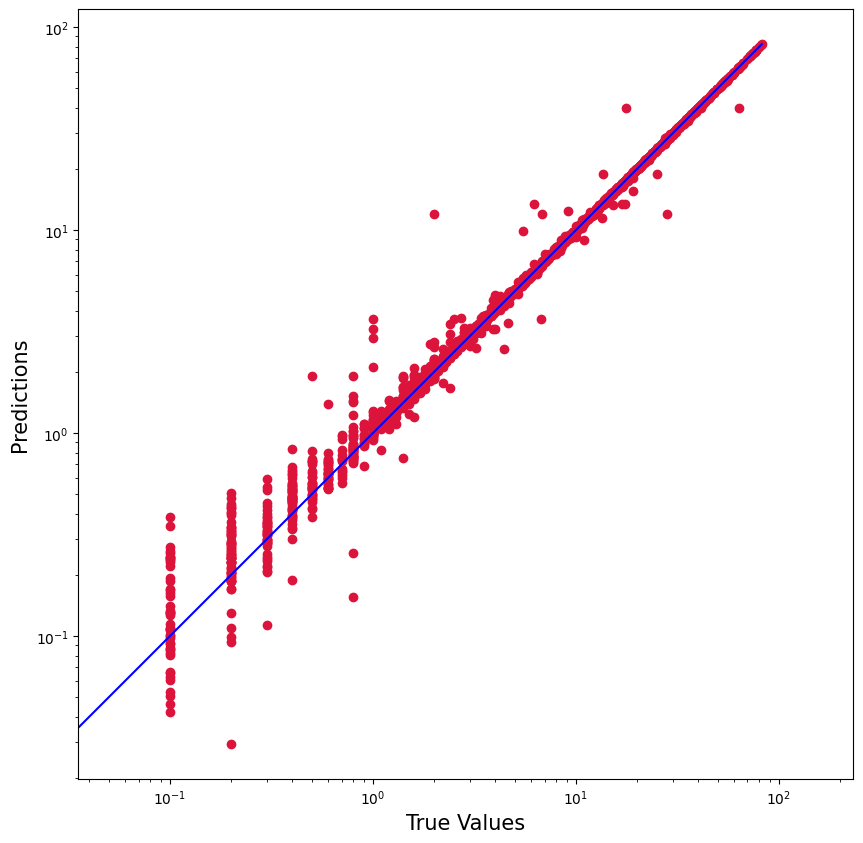

In [163]:
plt.figure(figsize=(10,10))

true_value = df_test['Chuva att (mm)']
predicted_value = df_test['Previsão']
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

NameError: name 'pyplot' is not defined

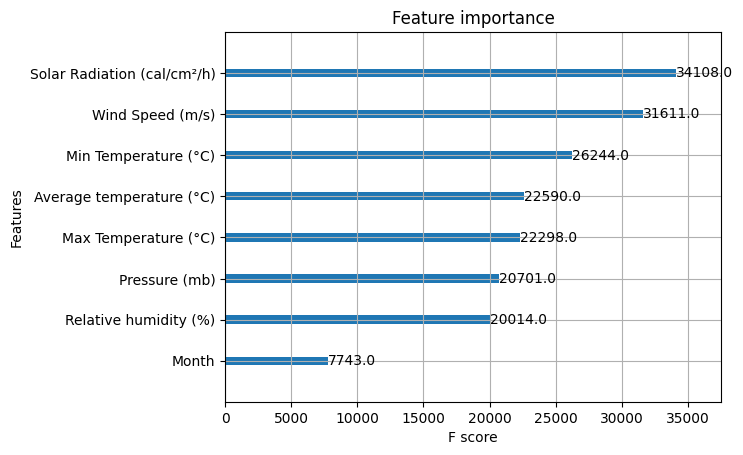

In [164]:
from xgboost import plot_importance
plot_importance(xg_reg)
pyplot.show()